In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from datetime import datetime 
from matplotlib import dates
%matplotlib inline


In [2]:
df=pd.read_csv('Walmart_Store_sales.csv',parse_dates=['Date'])

In [3]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
df.shape

(6435, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [6]:
df['Store']

0        1
1        1
2        1
3        1
4        1
        ..
6430    45
6431    45
6432    45
6433    45
6434    45
Name: Store, Length: 6435, dtype: int64

In [7]:
df['Weekly_Sales'].max()

3818686.45

In [8]:
df['Weekly_Sales'].sort_values()

4619     209986.25
4614     213538.32
4675     215359.21
4623     219804.85
4671     220060.35
           ...    
1762    3595903.20
527     3676388.98
1333    3749057.69
2763    3766687.43
1905    3818686.45
Name: Weekly_Sales, Length: 6435, dtype: float64

## 1905 store has maximum weekly_sales

In [9]:
df['Store'].std()

12.988182381175474

In [10]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [11]:
df['Day']=pd.DatetimeIndex(df['Date']).day
df['Month']=pd.DatetimeIndex(df['Date']).month
df['Year']=pd.DatetimeIndex(df['Date']).year
df['Quarter']=pd.DatetimeIndex(df['Date']).quarter

In [12]:
total_sales_for_each_store=df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)
total_sales_for_each_store

Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
10    2.716177e+08
27    2.538559e+08
6     2.237561e+08
1     2.224028e+08
39    2.074455e+08
19    2.066349e+08
31    1.996139e+08
23    1.987506e+08
24    1.940160e+08
11    1.939628e+08
28    1.892637e+08
41    1.813419e+08
32    1.668192e+08
18    1.551147e+08
22    1.470756e+08
12    1.442872e+08
26    1.434164e+08
34    1.382498e+08
40    1.378703e+08
35    1.315207e+08
8     1.299512e+08
17    1.277821e+08
45    1.123953e+08
21    1.081179e+08
25    1.010612e+08
43    9.056544e+07
15    8.913368e+07
7     8.159828e+07
42    7.956575e+07
9     7.778922e+07
29    7.714155e+07
16    7.425243e+07
37    7.420274e+07
30    6.271689e+07
3     5.758674e+07
38    5.515963e+07
36    5.341221e+07
5     4.547569e+07
44    4.329309e+07
33    3.716022e+07
Name: Weekly_Sales, dtype: float64

##### Store 20 has maximum sales

In [13]:
max_std_each_store=df.groupby('Store')['Weekly_Sales'].std().sort_values(ascending=False)
max_std_each_store

Store
14    317569.949476
10    302262.062504
20    275900.562742
4     266201.442297
13    265506.995776
23    249788.038068
27    239930.135688
2     237683.694682
39    217466.454833
6     212525.855862
35    211243.457791
19    191722.638730
41    187907.162766
28    181758.967539
18    176641.510839
24    167745.677567
11    165833.887863
22    161251.350631
1     155980.767761
12    139166.871880
32    138017.252087
45    130168.526635
21    128752.812853
31    125855.942933
15    120538.652043
40    119002.112858
25    112976.788600
7     112585.469220
17    112162.936087
26    110431.288141
8     106280.829881
34    104630.164676
29     99120.136596
16     85769.680133
9      69028.666585
36     60725.173579
42     50262.925530
3      46319.631557
38     42768.169450
43     40598.413260
5      37737.965745
44     24762.832015
33     24132.927322
30     22809.665590
37     21837.461190
Name: Weekly_Sales, dtype: float64

In [14]:
coef_mean_to_std=(df.groupby('Store')['Weekly_Sales'].std()/df.groupby('Store')['Weekly_Sales'].mean())
coef_mean_to_std

Store
1     0.100292
2     0.123424
3     0.115021
4     0.127083
5     0.118668
6     0.135823
7     0.197305
8     0.116953
9     0.126895
10    0.159133
11    0.122262
12    0.137925
13    0.132514
14    0.157137
15    0.193384
16    0.165181
17    0.125521
18    0.162845
19    0.132680
20    0.130903
21    0.170292
22    0.156783
23    0.179721
24    0.123637
25    0.159860
26    0.110111
27    0.135155
28    0.137330
29    0.183742
30    0.052008
31    0.090161
32    0.118310
33    0.092868
34    0.108225
35    0.229681
36    0.162579
37    0.042084
38    0.110875
39    0.149908
40    0.123430
41    0.148177
42    0.090335
43    0.064104
44    0.081793
45    0.165613
Name: Weekly_Sales, dtype: float64

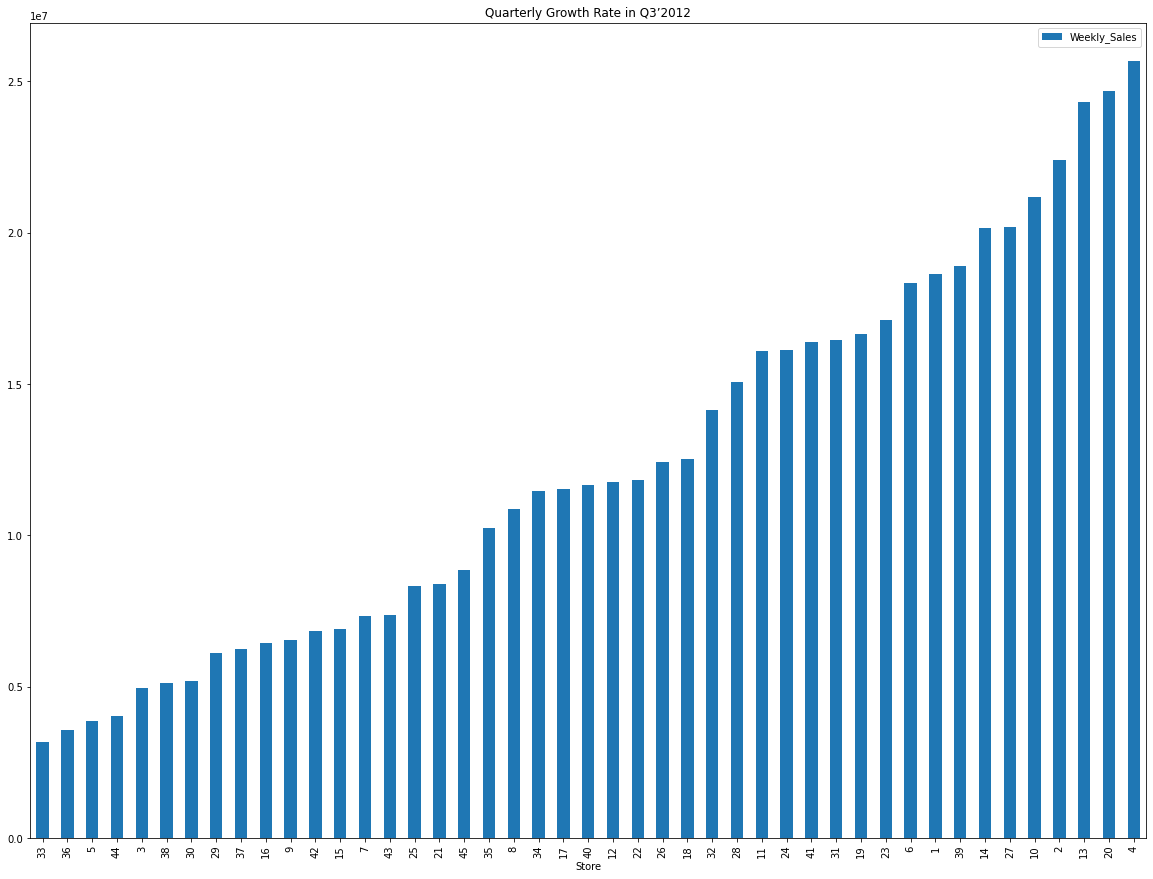

In [15]:
plt.figure(figsize=(20,15))
Q3=df[(df['Date']>'2012-07-01')& (df['Date']<'2012-09-30')].groupby('Store')['Weekly_Sales'].sum().sort_values()

Q3.plot(title='Quarterly Growth Rate in Q3’2012', x='Store',y='Weekly_Sales',kind='bar',legend=True)
plt.show()


### Store 4 has good quarterly growth rate in Q3'2012

In [16]:
holiday_label=['Super Bowl','Labour Day', 'Thanksgiving','Christmas']
Super_Bowl =['12-2-2010', '11-2-2011', '10-2-2012']
Labour_Day =  ['10-9-2010', '9-9-2011', '7-9-2012']
Thanksgiving =  ['26-11-2010', '25-11-2011', '23-11-2012']
Christmas = ['31-12-2010', '30-12-2011', '28-12-2012']
holiday_date=['12-2-2010', '11-2-2011', '10-2-2012','10-9-2010', '9-9-2011', '7-9-2012','26-11-2010', '25-11-2011', '23-11-2012','31-12-2010', '30-12-2011', '28-12-2012']

In [17]:
def plot_line(df,holiday_dates,holiday_label):
    fig,ax=plt.subplots(figsize=(15,7))
    ax.plot(df['Date'],df['Weekly_Sales'],label=holiday_label)
    for day in holiday_dates:
        day=datetime.strptime(day,'%d-%M-%Y')
        plt.axvline(x=day,c='r',linestyle='--')
    plt.title(holiday_label)
    x_date=df['Date'].dt.strftime('%Y-%m-%d').sort_values().unique()
    a=dates.DateFormatter('%d-%m-%Y')
    ax.xaxis.set_major_formatter(a)
    ax.xaxis.set_major_locator(dates.DayLocator(1))
    plt.gcf().autofmt_xdate(rotation=90)
    plt.show()

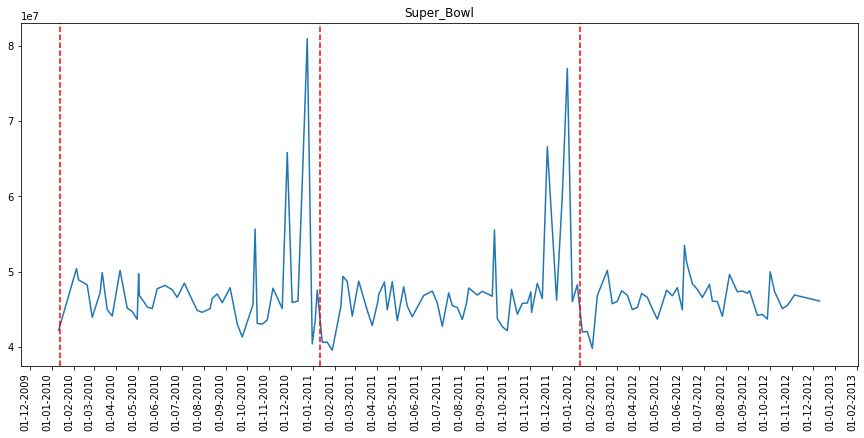

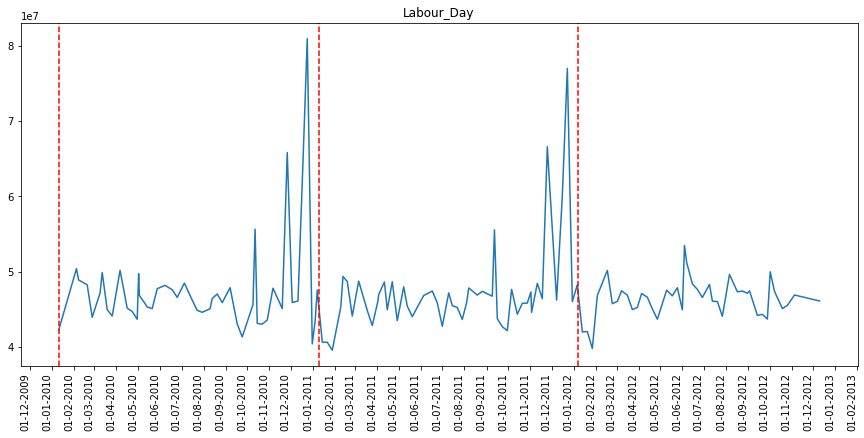

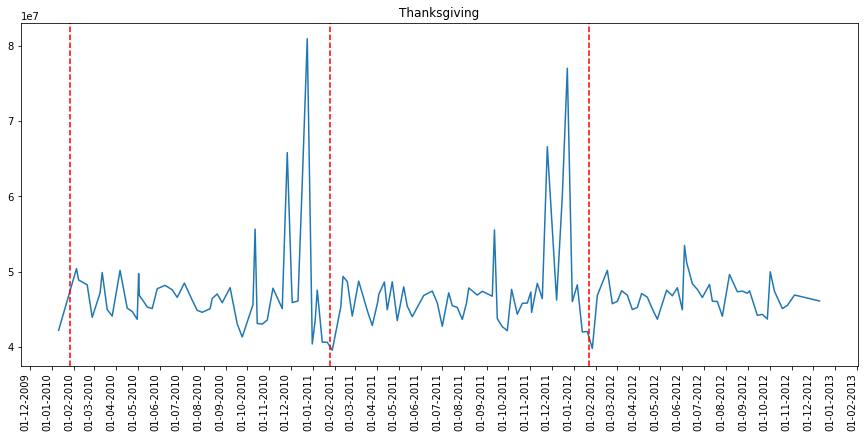

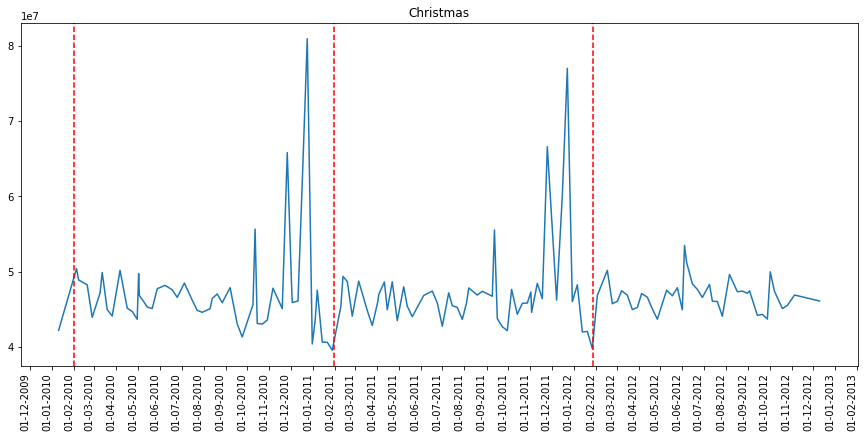

In [18]:
total_sales=df.groupby('Date')['Weekly_Sales'].sum().reset_index()
plot_line(total_sales,Super_Bowl,'Super_Bowl')
plot_line(total_sales,Labour_Day,'Labour_Day')
plot_line(total_sales,Thanksgiving,'Thanksgiving')
plot_line(total_sales,Christmas,'Christmas')


### Sales increased after thanksgiving
### Sales increased during Christmas
### Sales droped after Super_Bowl
### Sales increased after Labour_Day when a Quarter is past

<AxesSubplot:title={'center':'Yearly Sales on Christmas Day'}, xlabel='Year'>

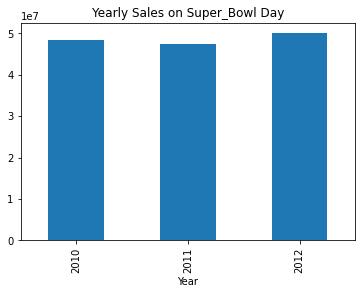

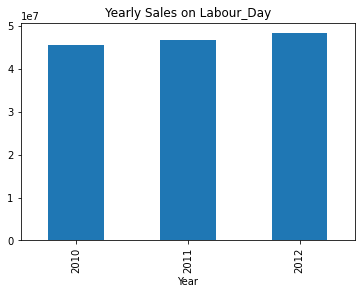

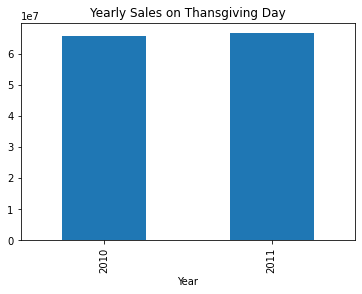

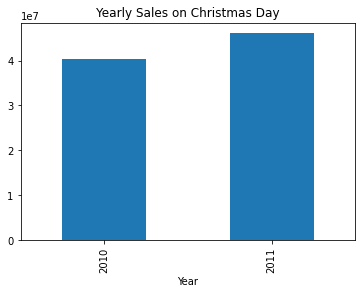

In [19]:
Super_Bowl_df=pd.DataFrame(df.loc[df.Date.isin(Super_Bowl)].groupby('Year')['Weekly_Sales'].sum())
Labour_Day_df=pd.DataFrame(df.loc[df.Date.isin(Labour_Day)].groupby('Year')['Weekly_Sales'].sum())
Thanksgiving_df=pd.DataFrame(df.loc[df.Date.isin(Thanksgiving)].groupby('Year')['Weekly_Sales'].sum())
Christmas_df=pd.DataFrame(df.loc[df.Date.isin(Christmas)].groupby('Year')['Weekly_Sales'].sum())

Super_Bowl_df.plot(kind='bar',legend=False,title='Yearly Sales on Super_Bowl Day')
Labour_Day_df.plot(kind='bar',legend=False,title='Yearly Sales on Labour_Day')
Thanksgiving_df.plot(kind='bar',legend=False,title='Yearly Sales on Thansgiving Day')
Christmas_df.plot(kind='bar',legend=False,title='Yearly Sales on Christmas Day')

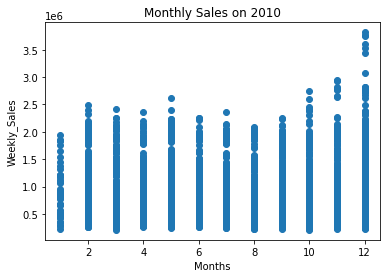

In [20]:
plt.scatter(df[df.Year==2010]['Month'],df[df.Year==2010]['Weekly_Sales'])
plt.xlabel('Months')
plt.ylabel('Weekly_Sales')
plt.title('Monthly Sales on 2010')
plt.show()

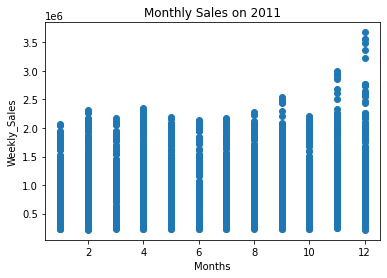

In [21]:
plt.scatter(df[df.Year==2011]['Month'],df[df.Year==2011]['Weekly_Sales'])
plt.xlabel('Months')
plt.ylabel('Weekly_Sales')
plt.title('Monthly Sales on 2011')
plt.show()

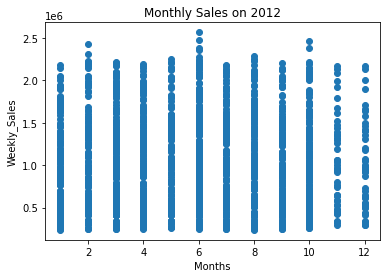

In [22]:
plt.scatter(df[df.Year==2012]['Month'],df[df.Year==2012]['Weekly_Sales'])
plt.xlabel('Months')
plt.ylabel('Weekly_Sales')
plt.title('Monthly Sales on 2012')
plt.show()

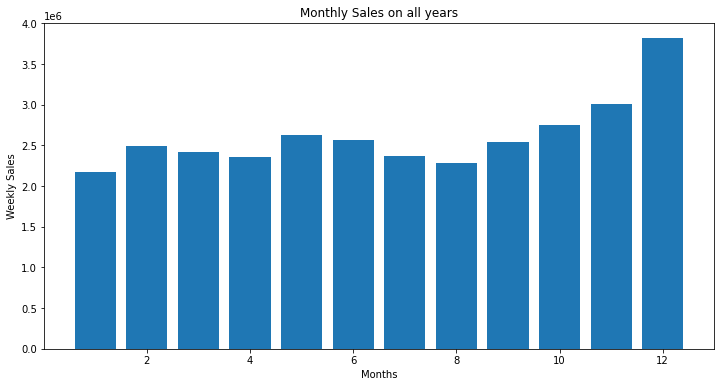

In [23]:
plt.figure(figsize=(12,6))
plt.bar(x=df['Month'],height=df['Weekly_Sales'])
plt.xlabel('Months')
plt.ylabel('Weekly Sales')
plt.title('Monthly Sales on all years')
plt.show()
                              

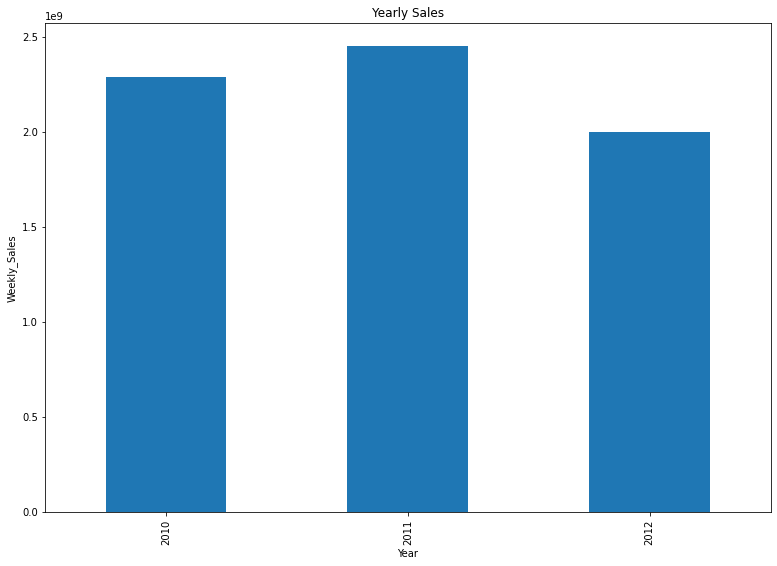

In [24]:
plt.figure(figsize=(13,9))
df.groupby('Year')['Weekly_Sales'].sum().plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Weekly_Sales')
plt.title('Yearly Sales')
plt.show()

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/site-packages/seaborn

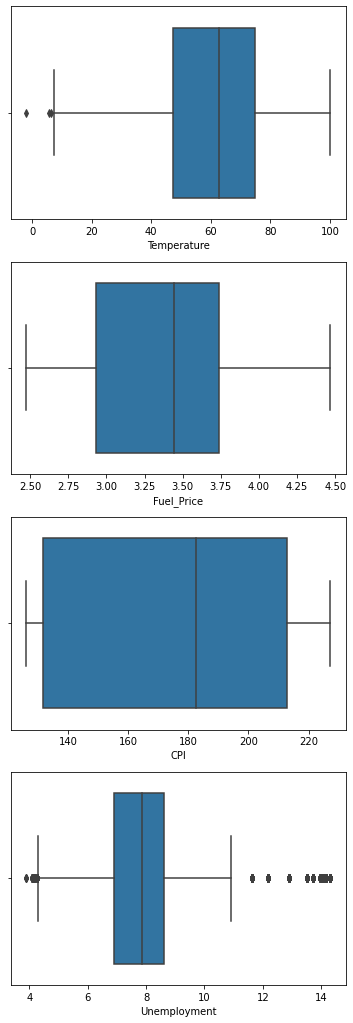

In [25]:
fig, axs = plt.subplots(4,figsize=(6,18))
X = df[['Temperature','Fuel_Price','CPI','Unemployment']]
for i,column in enumerate(X):
    sns.boxplot(df[column], ax=axs[i])

In [26]:
df_new=df[(df['Unemployment']>4.5)& (df['Unemployment']<10)&(df['Temperature']>10)]
df_new

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year,Quarter
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010,2
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010,4
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010,1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010,1
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010,2
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012,3
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,10,5,2012,2
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,10,12,2012,4
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012,4


/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/site-packages/seaborn

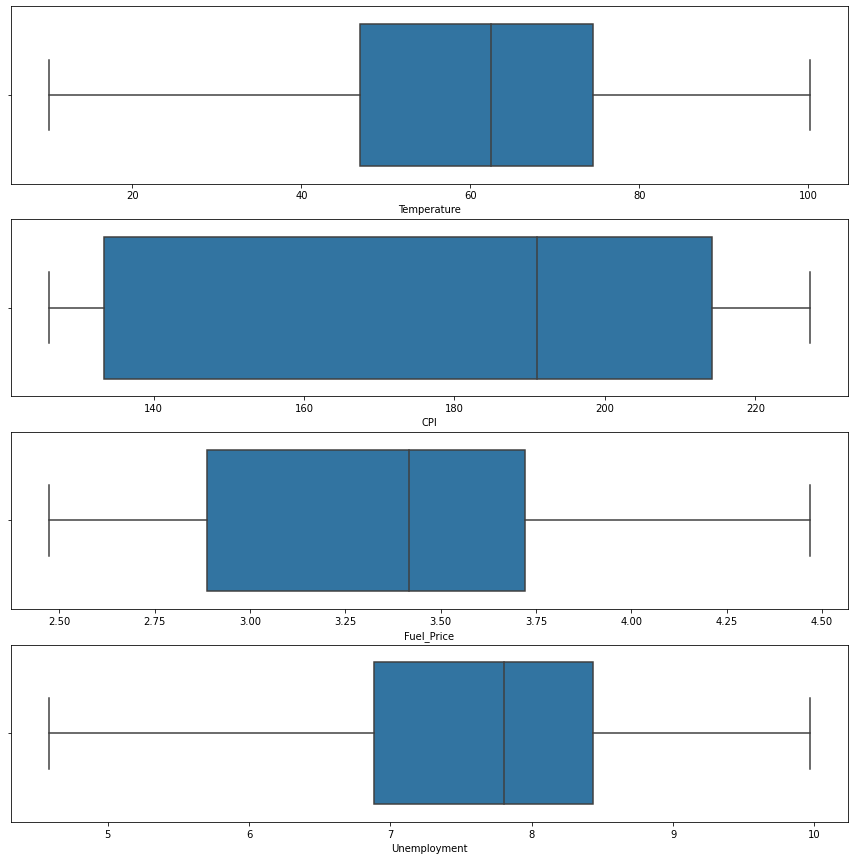

In [27]:
fig,axs=plt.subplots(4,figsize=(15,15))
S=df_new[['Temperature','CPI','Fuel_Price','Unemployment']]
for i, column in enumerate(S):
    sns.boxplot(df_new[column],ax=axs[i])

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [29]:
X=df_new[['Store','CPI','Unemployment','Fuel_Price','Temperature','Day','Month','Year']]
Y=df_new['Weekly_Sales']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [30]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(4526, 8)
(1132, 8)
(4526,)
(1132,)


In [31]:
print("Linear Regression")
print('')
reg=LinearRegression()
reg.fit(X_train,Y_train)
y_pred=reg.predict(X_test)
y_pred

Linear Regression



array([1055712.51530952,  930063.36858447,  750125.85093886, ...,
       1144299.52553383, 1255017.94164428,  957534.75847868])

In [32]:
print("Accuracy: ",reg.score(X_train,Y_train)*100)
print("Mean Absolute Error: ",metrics.mean_absolute_error(Y_test,y_pred))
print("Mean Squared Error: ",metrics.mean_squared_error(Y_test,y_pred))
print("Root Mean Square Error: ",np.sqrt(metrics.mean_squared_error(Y_test,y_pred)))

Accuracy:  13.09539931375886
Mean Absolute Error:  456247.056870036
Mean Squared Error:  299724575088.78534
Root Mean Square Error:  547471.0723762355


/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Weekly Sales Prediction')

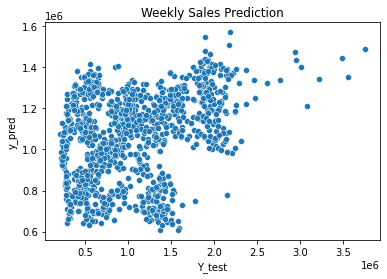

In [33]:
sns.scatterplot(Y_test,y_pred)
plt.xlabel("Y_test")
plt.ylabel("y_pred")
plt.title("Weekly Sales Prediction")
           

In [34]:
print("Random Forest Regressor:")
print(" ")
RFR=RandomForestRegressor()
RFR.fit(X_train,Y_train)
y_pred_RFR=RFR.predict(X_test)
y_pred_RFR

Random Forest Regressor:
 


array([ 301658.0129,  720254.0656, 1275798.5518, ...,  313306.4305,
       1929458.9998,  587182.1183])

Accuracy:  99.23179698968143
Mean Absolute Error:  62461.25991899295
Mean Squared Error:  14414415333.354418
Root Mean Squared Error:  120060.04886453452


/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'y_pred_RFR')

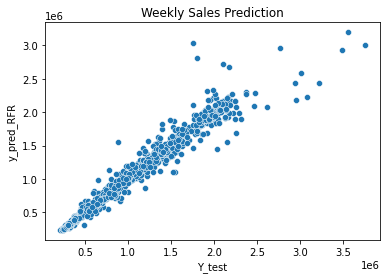

In [35]:
print("Accuracy: ", RFR.score(X_train,Y_train)*100)
print("Mean Absolute Error: ",metrics.mean_absolute_error(Y_test,y_pred_RFR))
print("Mean Squared Error: ",metrics.mean_squared_error(Y_test,y_pred_RFR))
print("Root Mean Squared Error: ",np.sqrt(metrics.mean_squared_error(Y_test,y_pred_RFR)))
sns.scatterplot(Y_test,y_pred_RFR)
plt.title("Weekly Sales Prediction")
plt.xlabel("Y_test")
plt.ylabel("y_pred_RFR")